<a href="https://colab.research.google.com/github/ashamril/ularsawa/blob/master/Malaysia_CoronaVirus_Covid_19_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly as px

In [0]:
confirm = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirm.rename(columns={'Country/Region':'Country'}, inplace=True)
recover = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
recover.rename(columns={'Country/Region':'Country'}, inplace=True)
death = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
death.rename(columns={'Country/Region':'Country'}, inplace=True)

In [0]:
df_conf_malaysia = confirm[confirm.Country == 'Malaysia']
df_recov_malaysia = recover[recover.Country == 'Malaysia']
df_death_malaysia = death[death.Country == 'Malaysia']

drop_columns = ['Province/State', 'Country', 'Lat', 'Long']
df_conf_malaysia = df_conf_malaysia.drop(drop_columns, axis=1)
df_recov_malaysia = df_recov_malaysia.drop(drop_columns, axis=1)
df_death_malaysia = df_death_malaysia.drop(drop_columns, axis=1)

In [79]:
df_conf_malaysia

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
153,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306,1518,1624,1796,2031,2161,2320,2470


In [80]:
df_recov_malaysia

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,3,7,7,7,13,15,15,15,15,15,18,18,18,18,18,18,18,18,22,22,22,22,23,24,24,24,26,26,26,35,42,42,49,60,75,87,114,139,139,183,199,215,259,320,388


In [81]:
df_death_malaysia

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,4,10,14,16,20,23,26,27,35


In [0]:
df_conf_malaysia = df_conf_malaysia.melt()
df_conf_malaysia.rename(columns={'variable':'Date', 'value':'Confirmed'}, inplace=True)
df_recov_malaysia = df_recov_malaysia.melt()
df_recov_malaysia.rename(columns={'variable':'Date', 'value':'Recovered'}, inplace=True)
df_death_malaysia = df_death_malaysia.melt()
df_death_malaysia.rename(columns={'variable':'Date', 'value':'Deaths'}, inplace=True)

In [83]:
df_cases_malaysia = df_conf_malaysia.join(df_recov_malaysia['Recovered']).join(df_death_malaysia['Deaths'])
df_cases_malaysia

,Date,Confirmed,Recovered,Deaths
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,3,0,0
4,1/26/20,4,0,0
...,...,...,...,...
63,3/25/20,1796,199,20
64,3/26/20,2031,215,23
65,3/27/20,2161,259,26
66,3/28/20,2320,320,27


In [84]:
# Use diff to get new daily cases count
df_cases_malaysia['New_Confirmed'] = df_cases_malaysia['Confirmed'].diff()
df_cases_malaysia['New_Recovered'] = df_cases_malaysia['Recovered'].diff()
df_cases_malaysia['New_Deaths'] = df_cases_malaysia['Deaths'].diff()
df_cases_malaysia

,Date,Confirmed,Recovered,Deaths,New_Confirmed,New_Recovered,New_Deaths
0,1/22/20,0,0,0,NaN,NaN,NaN
1,1/23/20,0,0,0,0.0,0.0,0.0
2,1/24/20,0,0,0,0.0,0.0,0.0
3,1/25/20,3,0,0,3.0,0.0,0.0
4,1/26/20,4,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
63,3/25/20,1796,199,20,172.0,16.0,4.0
64,3/26/20,2031,215,23,235.0,16.0,3.0
65,3/27/20,2161,259,26,130.0,44.0,3.0
66,3/28/20,2320,320,27,159.0,61.0,1.0


In [85]:
df_cases_malaysia.isna().sum()

Date             0
Confirmed        0
Recovered        0
Deaths           0
New_Confirmed    1
New_Recovered    1
New_Deaths       1
dtype: int64

In [86]:
# Replace NaN 
df_cases_malaysia.fillna(0, inplace=True)
df_cases_malaysia.isna().sum()

Date             0
Confirmed        0
Recovered        0
Deaths           0
New_Confirmed    0
New_Recovered    0
New_Deaths       0
dtype: int64

In [87]:
df_cases_malaysia

,Date,Confirmed,Recovered,Deaths,New_Confirmed,New_Recovered,New_Deaths
0,1/22/20,0,0,0,0.0,0.0,0.0
1,1/23/20,0,0,0,0.0,0.0,0.0
2,1/24/20,0,0,0,0.0,0.0,0.0
3,1/25/20,3,0,0,3.0,0.0,0.0
4,1/26/20,4,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
63,3/25/20,1796,199,20,172.0,16.0,4.0
64,3/26/20,2031,215,23,235.0,16.0,3.0
65,3/27/20,2161,259,26,130.0,44.0,3.0
66,3/28/20,2320,320,27,159.0,61.0,1.0


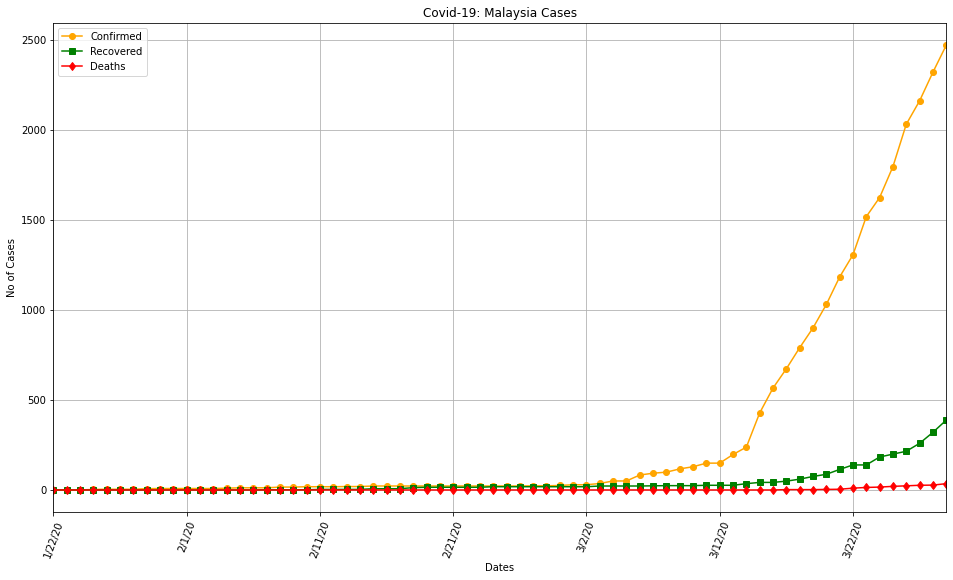

In [88]:
fig, ax = plt.subplots(1,1, figsize=(16,9))
ax = plt.gca()

ax = df_cases_malaysia.plot(kind='line',x='Date',y='Confirmed', color='orange', ax=ax, marker='o')
ax = df_cases_malaysia.plot(kind='line',x='Date',y='Recovered', color='green', ax=ax, marker='s')
ax = df_cases_malaysia.plot(kind='line',x='Date',y='Deaths', color='red', ax=ax, marker='d')
plt.ylabel('No of Cases')
plt.xticks(rotation=70)
plt.xlabel('Dates')
plt.grid(True)
plt.legend(loc=2)
plt.title('Covid-19: Malaysia Cases')

plt.show()

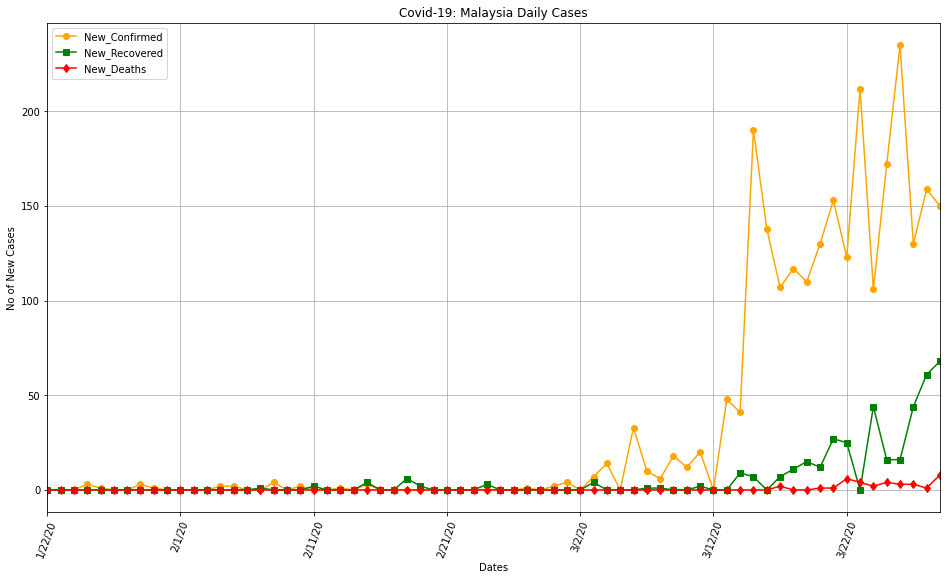

In [89]:
# Line plot
fig, ax = plt.subplots(1,1, figsize=(16,9))
ax = plt.gca()

ax = df_cases_malaysia.plot(kind='line',x='Date',y='New_Confirmed', color='orange', ax=ax, marker='o')
ax = df_cases_malaysia.plot(kind='line',x='Date',y='New_Recovered', color='green', ax=ax, marker='s')
ax = df_cases_malaysia.plot(kind='line',x='Date',y='New_Deaths', color='red', ax=ax, marker='d')
plt.ylabel('No of New Cases')
plt.xticks(rotation=70)
plt.xlabel('Dates')
plt.grid(True)
plt.legend(loc=2)
plt.title('Covid-19: Malaysia Daily Cases')

plt.show()

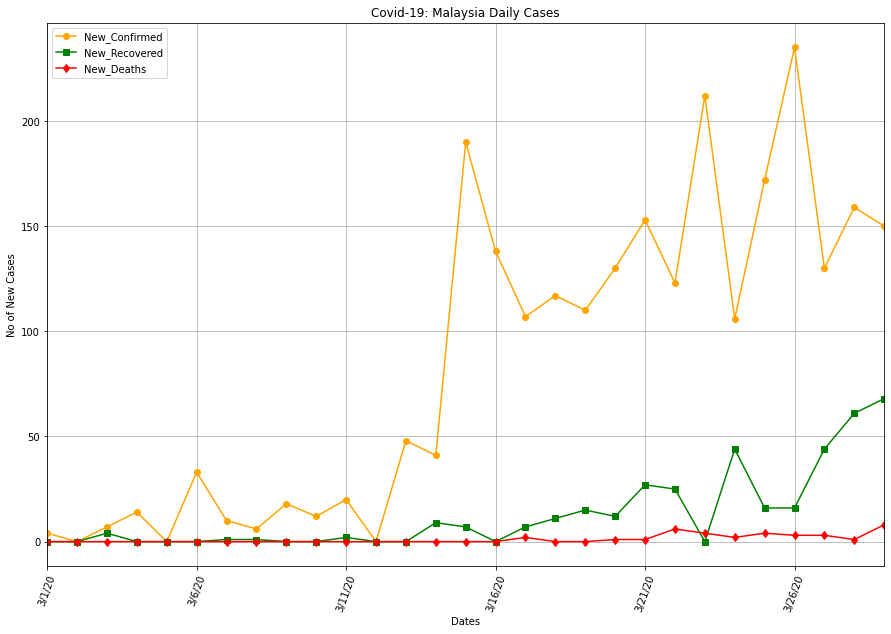

In [90]:
# Line plot
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax = plt.gca()

days = 29
df_days = df_cases_malaysia.tail(days)

ax = df_days.plot(kind='line',x='Date',y='New_Confirmed', color='orange', ax=ax, marker='o')
ax = df_days.plot(kind='line',x='Date',y='New_Recovered', color='green', ax=ax, marker='s')
ax = df_days.plot(kind='line',x='Date',y='New_Deaths', color='red', ax=ax, marker='d')
plt.ylabel('No of New Cases')
plt.xticks(rotation=70)
plt.xlabel('Dates')
plt.grid(True)
plt.legend(loc=2)
plt.title('Covid-19: Malaysia Daily Cases')

plt.show()

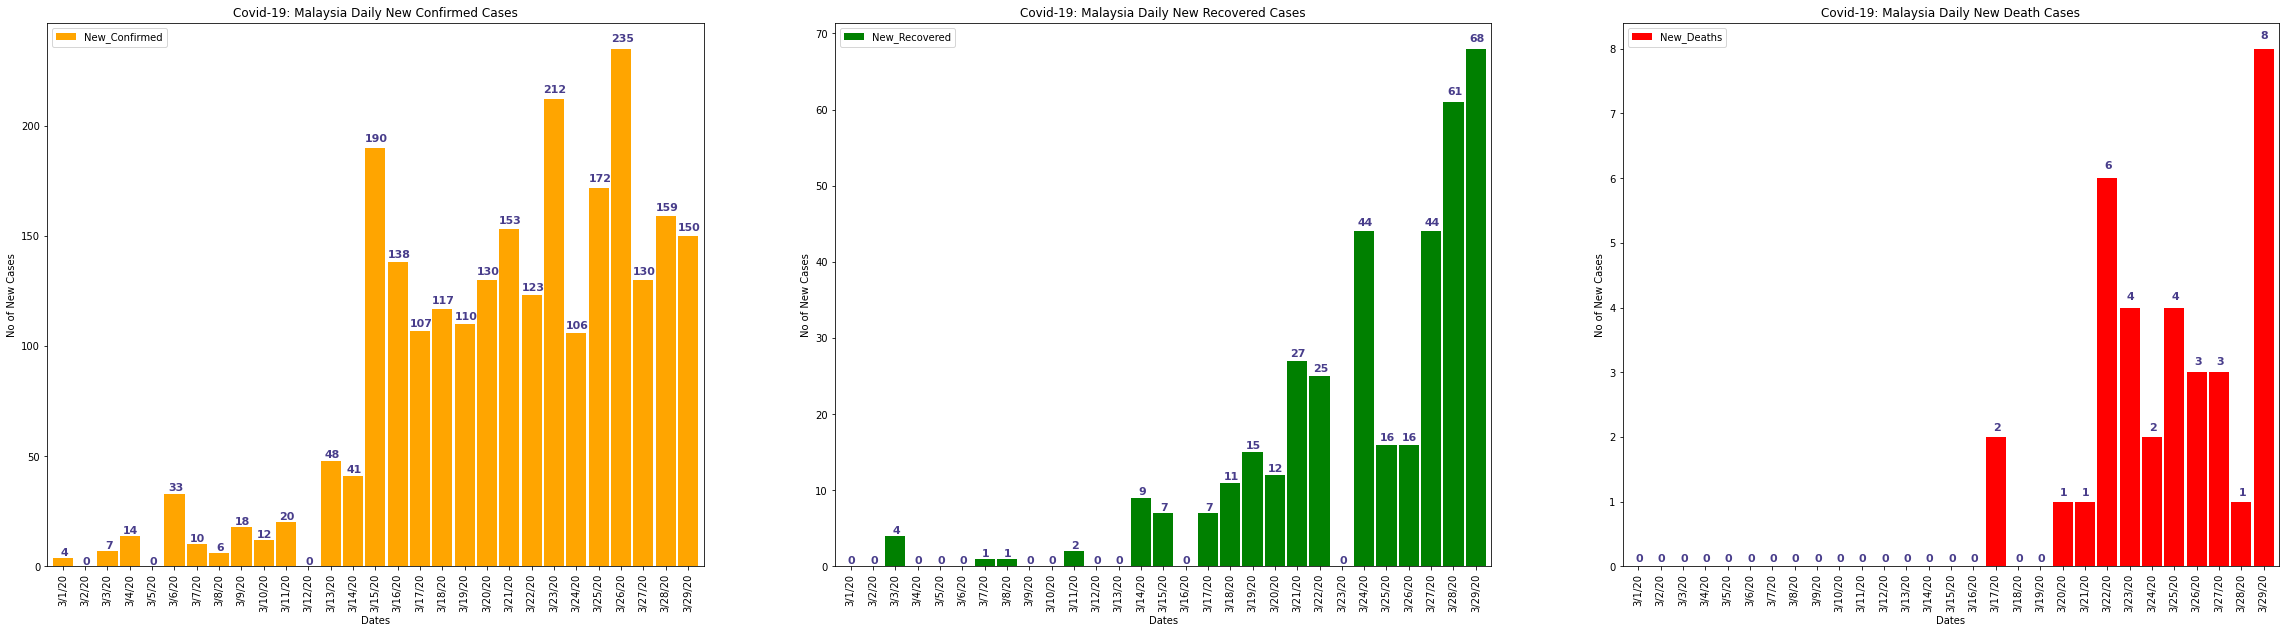

In [91]:
# Bar plot
fig, ax = plt.subplots(1,3, figsize=(40,10))

df_days = df_cases_malaysia.tail(days)
result_table = df_days.set_index('Date')

plt.subplot(1, 3, 1)
ax = result_table.New_Confirmed.plot.bar(color='orange', width=0.9)
plt.ylabel('No of New Cases')
plt.xticks(rotation=90)
plt.xlabel('Dates')
plt.grid(False)
plt.legend(loc=2)
plt.title('Covid-19: Malaysia Daily New Confirmed Cases')

#label = result_table.New_Confirmed.values.astype(int)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.5, p.get_height() * 1.01 + 0.05), fontweight='bold', 
                fontsize=11, horizontalalignment='center', verticalalignment='bottom', rotation=0, 
                color='darkslateblue')

plt.subplot(1, 3, 2)
ax = result_table.New_Recovered.plot.bar(color='green', width=0.9)
plt.ylabel('No of New Cases')
plt.xticks(rotation=90)
plt.xlabel('Dates')
plt.grid(False)
plt.legend(loc=2)
plt.title('Covid-19: Malaysia Daily New Recovered Cases')

#label = result_table.New_Recovered.values.astype(int)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.5, p.get_height() * 1.01 + 0.05), fontweight='bold', 
                fontsize=11, horizontalalignment='center', verticalalignment='bottom', rotation=0, 
                color='darkslateblue')

plt.subplot(1, 3, 3)
ax = result_table.New_Deaths.plot.bar(color='red', width=0.9)
plt.ylabel('No of New Cases')
plt.xticks(rotation=90)
plt.xlabel('Dates')
plt.grid(False)
plt.legend(loc=2)
plt.title('Covid-19: Malaysia Daily New Death Cases')

#label = result_table.New_Deaths.values.astype(int)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.5, p.get_height() * 1.01 + 0.05), fontweight='bold', 
                fontsize=11, horizontalalignment='center', verticalalignment='bottom', rotation=0, 
                color='darkslateblue')

plt.show()

In [92]:
df_cases_malaysia.describe()

,Confirmed,Recovered,Deaths,New_Confirmed,New_Recovered,New_Deaths
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,335.455882,42.294118,2.705882,36.323529,5.705882,0.514706
std,641.408954,77.611943,7.381014,63.501426,13.729866,1.460859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,18.000000,0.000000,1.500000,0.000000,0.000000
75%,161.000000,26.000000,0.000000,35.000000,3.250000,0.000000
max,2470.000000,388.000000,35.000000,235.000000,68.000000,8.000000


In [93]:
df_days.describe()

,Confirmed,Recovered,Deaths,New_Confirmed,New_Recovered,New_Deaths
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,767.034483,91.137931,6.344828,84.310345,12.758621,1.206897
std,804.977350,100.163696,10.317377,74.087354,18.948530,2.059461
min,29.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,24.000000,0.000000,12.000000,0.000000,0.000000
50%,428.000000,42.000000,0.000000,106.000000,4.000000,0.000000
75%,1306.000000,139.000000,10.000000,138.000000,16.000000,2.000000
max,2470.000000,388.000000,35.000000,235.000000,68.000000,8.000000


In [94]:
df_days = df_days.reset_index()
df_days.head()

,index,Date,Confirmed,Recovered,Deaths,New_Confirmed,New_Recovered,New_Deaths
0,39,3/1/20,29,18,0,4.0,0.0,0.0
1,40,3/2/20,29,18,0,0.0,0.0,0.0
2,41,3/3/20,36,22,0,7.0,4.0,0.0
3,42,3/4/20,50,22,0,14.0,0.0,0.0
4,43,3/5/20,50,22,0,0.0,0.0,0.0


In [95]:
df_days = df_days[['Date', 'New_Confirmed']]
df_days.head()

,Date,New_Confirmed
0,3/1/20,4.0
1,3/2/20,0.0
2,3/3/20,7.0
3,3/4/20,14.0
4,3/5/20,0.0


In [96]:
# Prophet requires the date column to be named ds and the feature column to be named y
df_days.rename(columns={'Date':'ds','New_Confirmed':'y'}, inplace=True)
df_days.tail()

,ds,y
24,3/25/20,172.0
25,3/26/20,235.0
26,3/27/20,130.0
27,3/28/20,159.0
28,3/29/20,150.0


In [97]:
df_days.shape

(29, 2)

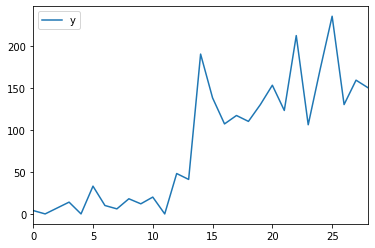

In [98]:
df_days.plot()

In [99]:
# fbprophet 

import fbprophet
from fbprophet import Prophet

model = Prophet(interval_width=0.95)
model.add_seasonality(name = "15 days", period=15, fourier_order=5)
model.fit(df_days)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


In [100]:
# Create Future Dates of 30 days
period = 14
future_dates = model.make_future_dataframe(periods=period)
forecast_days = model.predict(future_dates)
forecast_days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
28,2020-03-29,184.572437,135.666799,229.150979
29,2020-03-30,304.638436,260.385574,349.129929
30,2020-03-31,262.448996,211.050814,309.752305
31,2020-04-01,243.521734,194.640434,293.623516
32,2020-04-02,270.918018,222.967777,320.223256
33,2020-04-03,281.183826,231.492272,326.781711
34,2020-04-04,245.296460,198.692950,290.957926
35,2020-04-05,246.819030,198.681776,297.668674
36,2020-04-06,306.253260,256.770567,354.259324
37,2020-04-07,266.246568,216.855736,314.272812


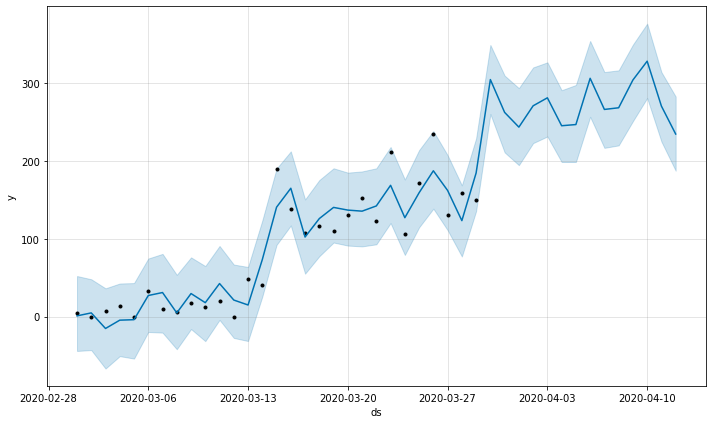

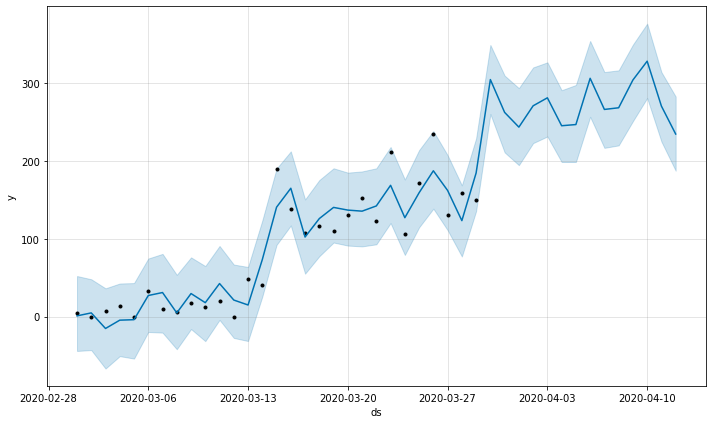

In [101]:
model.plot(forecast_days)

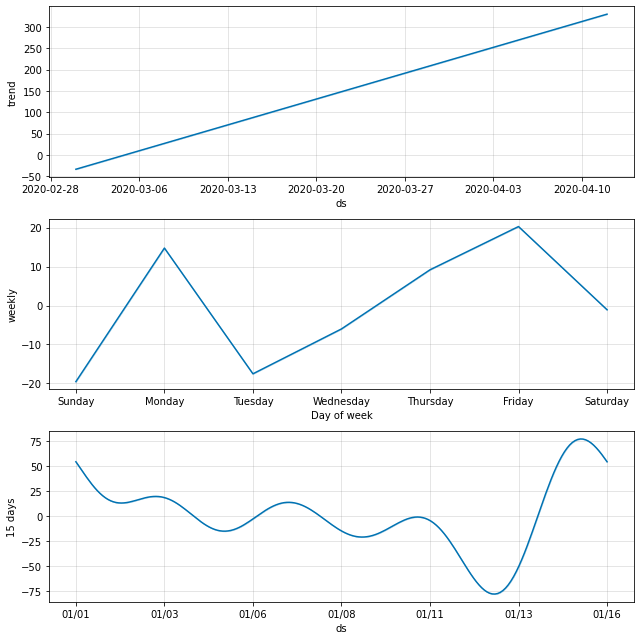

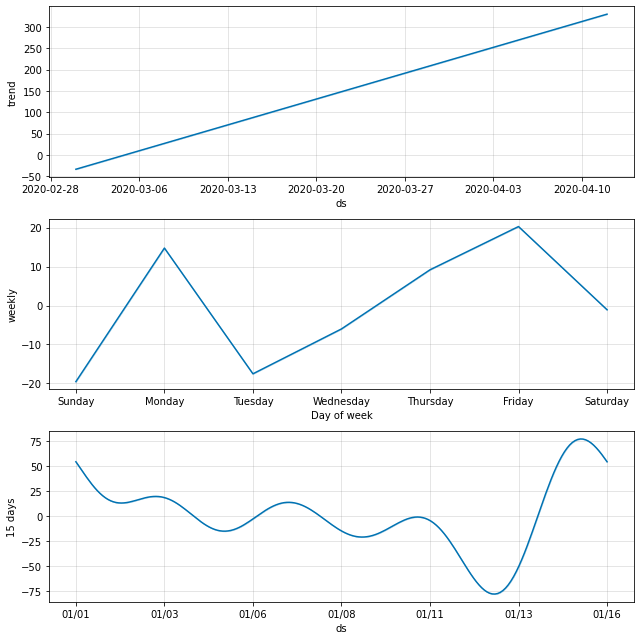

In [102]:
model.plot_components(forecast_days)

In [0]:
# Function to create df forecast and actual values
def make_comparison_df(historical, forecast):
    return forecast.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(historical.set_index("ds"))
    #return forecast.set_index("ds")[["yhat"]].join(historical.set_index("ds"))

df_compare = make_comparison_df(df_days, forecast_days)
df_compare_forecast = df_compare.copy()
df_compare = df_compare.head(days)

In [106]:
# Metrics calculation by formula 

df = df_compare.copy()
df["e"] = df["y"] - df["yhat"]
mse_f = np.mean(df["e"]**2)
mae_f = np.mean(abs(df["e"]))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(df["e"]**2)/sum((df["y"]-np.mean(df["y"]))**2))
df["p"] = 100 * df["e"] / df["y"]
mape = np.mean(np.abs(df["p"]))

print("Metrics results by manual calculation:")
print("MAE:", np.round(mae_f, 2))
print("MSE:", np.round(mse_f, 2))
print("RMSE:", np.round(rmse_f, 2))
print("R-Squared:", np.round(r2_f, 2))
print("MAPE:", np.round(mape, 2))

Metrics results by manual calculation:
MAE: 20.64
MSE: 613.29
RMSE: 24.76
R-Squared: 0.88
MAPE: inf


In [107]:
# Metrics calculation by sklearn.metrics

import sklearn.metrics as metrics

df = df_compare.copy()
mae = metrics.mean_absolute_error(df["y"], df["yhat"])
mse = metrics.mean_squared_error(df["y"], df["yhat"])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(df["y"], df["yhat"])

print("Metrics results of sklearn.metrics:")
print("MAE:", np.round(mae, 2))
print("MSE:", np.round(mse, 2))
print("RMSE:", np.round(rmse, 2))
print("R-Squared:", np.round(r2, 2))

Metrics results of sklearn.metrics:
MAE: 20.64
MSE: 613.29
RMSE: 24.76
R-Squared: 0.88


In [105]:
# Forecast values
df_compare_forecast.tail(period + 1)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-03-29,184.572437,135.666799,229.150979,150.0
2020-03-30,304.638436,260.385574,349.129929,NaN
2020-03-31,262.448996,211.050814,309.752305,NaN
2020-04-01,243.521734,194.640434,293.623516,NaN
2020-04-02,270.918018,222.967777,320.223256,NaN
2020-04-03,281.183826,231.492272,326.781711,NaN
2020-04-04,245.296460,198.692950,290.957926,NaN
2020-04-05,246.819030,198.681776,297.668674,NaN
2020-04-06,306.253260,256.770567,354.259324,NaN
